In [1]:
import json

DATA_PART = "../../pubtabnet/anns/train"

with open(DATA_PART + "_lens.json", encoding="utf-8") as f:
        val_lens = json.load(f)

In [2]:
broken = ["PMC3856466_003_00"]

# Análise Da Distribuição dos Dados

In [3]:
lens = [item['len'] for item in val_lens]
lens = sorted(lens)

In [31]:
normal_limit = 1800
outlier_limit = 1200

In [32]:
summ_lens = 0

for lenght in lens:
    summ_lens += max(0, (1-normal_limit/lenght))

print(1-summ_lens/len(lens))

0.9990064715528767


In [6]:
import numpy as np

muX = np.average(lens)
sigX  = np.std(lens)

mu = np.log(muX**2/np.sqrt(muX**2+sigX**2))
sigma = np.sqrt(np.log(1+muX**2/sigX**2))

print(mu)
print(sigma)
print(np.median(lens))
print(np.std(lens))
print(max(lens))
print(min(lens))

n_allowed = 0
while(lens[n_allowed] < normal_limit):
    n_allowed += 1

print(n_allowed/len(lens))

5.840604762155069
0.9835012459722771
336.0
342.13070641293245
5445
26
0.9880525663119513


(array([[8.83159771e-04, 2.07970595e-03, 1.87114281e-03, 1.48687191e-03,
         1.12269895e-03, 8.46965786e-04, 6.56753902e-04, 4.91283049e-04,
         3.77726355e-04, 2.92094526e-04, 2.28749524e-04, 1.75906748e-04,
         1.32880789e-04, 1.00777144e-04, 7.72521590e-05, 5.74416454e-05,
         4.20089016e-05, 1.64498015e-05, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000

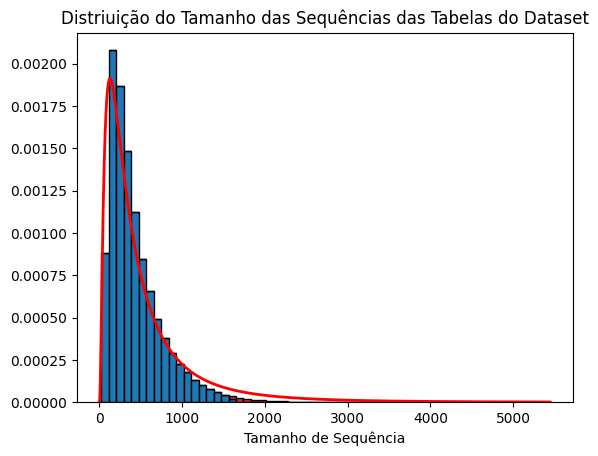

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import lognorm

x = np.array([1*i for i in range(1, max(lens))])

allowed_lens = lens[:n_allowed]
nallowed_lens = lens[n_allowed:]

pdf = pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/(x * sigma * np.sqrt(2 * np.pi)))


plt.title("Distriuição do Tamanho das Sequências das Tabelas do Dataset")

plt.xlabel("Tamanho de Sequência")

plt.plot(x, pdf, linewidth=2, color='r')

plt.hist([allowed_lens, nallowed_lens], bins = 60, color = ['tab:blue', 'tab:red'], edgecolor='black', density = True, stacked = True)

In [8]:
normal_tables = []
outlier_tables = []
for item in val_lens:
    if(item['file'] in broken):
        continue
    if item['len'] < 6000:
        normal_tables.append(item)
    if item['len'] > outlier_limit and item['len'] < 4500:
        outlier_tables.append(item)

In [9]:
len(normal_tables)

500777

In [10]:
len(outlier_tables)

19272

In [11]:
normal_tables[0]

{'file': 'PMC6051241_006_00.json', 'len': 280}

In [12]:
with open(DATA_PART + '_outlier_trunc_filelist.json', 'w') as out:
    for item in outlier_tables:
        out.write(item['file']+"\n")

In [13]:
with open(DATA_PART + '_trunc_filelist.json', 'w') as out:
    for item in normal_tables:
        out.write(item['file']+"\n")

In [14]:
len(val_lens)

500777

# Análise Do Uso de Memória

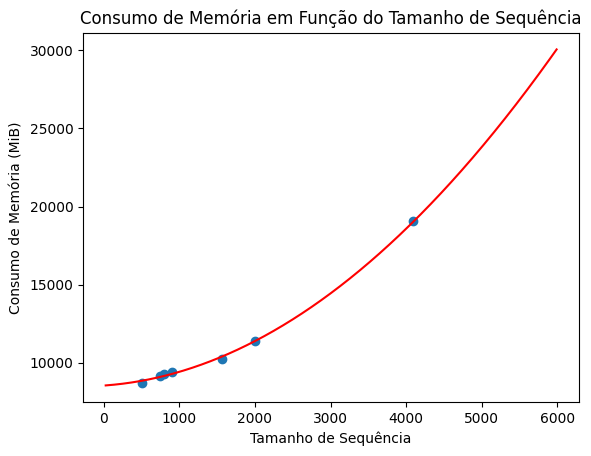

In [15]:
mem_cons = [(512,   8686),
            (750,   9128),
            (800,   9266),
            (900,   9438),
            (1563, 10246),
            (2000, 11416),
            (4096, 19044)
           ]

import numpy as np

seq_size = [item[0] for item in mem_cons]
mem = [item[1] for item in mem_cons]

model = np.poly1d(np.polyfit(seq_size, mem, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(min(lens), max(lens)*1.1, 1000)
plt.scatter(seq_size, mem)
plt.plot(polyline, model(polyline), color = 'red')


plt.title("Consumo de Memória em Função do Tamanho de Sequência")

plt.ylabel("Consumo de Memória (MiB)")
plt.xlabel("Tamanho de Sequência")

plt.show()

In [16]:
np.polynomial.polynomial.Polynomial.fit(seq_size, mem, 2, full= True)

(Polynomial([12202.16315476,  5090.77246292,  1745.49959028], domain=[ 512., 4096.], window=[-1.,  1.], symbol='x'),
 [array([87930.02275298]),
  3,
  array([1.51033714, 0.77024584, 0.35440523]),
  1.5543122344752192e-15])

In [17]:
print(model(3000))
print(model(1536))
print(model(max(lens)))

14442.689704426703
10341.005493350849
26487.871107670042


In [18]:
for item in val_lens:
    if( item['len'] > 4096):
        print(item['file'], item['len'])

PMC5767583_007_00.json 4255
PMC3856466_003_00.json 4576
PMC3171729_010_00.json 4190
PMC4154212_004_00.json 5445
PMC6014302_003_00.json 4600
PMC5812313_001_00.json 4924
PMC4613289_005_00.json 4235
PMC5520844_006_00.json 4419
PMC2396172_008_00.json 4205
PMC5537848_004_00.json 4749
